<a href="https://colab.research.google.com/github/JuanMaLR/jackal_velodyne_vlp16_lidar_ros_nav_stack/blob/main/Python_odometry_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Required to install to be able to read bagfiles
!pip install bagpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.4/100.4 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 8.5 MB/s eta 0:00:00
  Created wheel for gnupg: filename=gnupg-2.3.1-py3-none-any.whl size=94620 sha256=200e535420525d497b1873378025f0de4779d1796ac4848a0fcfd401b6

In [3]:
#Imports
#To manipulate bagfiles
import bagpy
from bagpy import bagreader
#For data analysis and plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#To smother the plots
from scipy.interpolate import make_interp_spline

In [7]:
#Read data from bag file
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_1_2D_LiDAR.bag')

[INFO]  Data folder /content/drive/MyDrive/Thesis/Bags/Test_1_2D_LiDAR already exists. Not creating.


In [8]:
#To verify topic name
b.topic_table

,Topics,Types,Message Count,Frequency
0,/amcl/parameter_descriptions,dynamic_reconfigure/ConfigDescription,1,NaN
1,/amcl/parameter_updates,dynamic_reconfigure/Config,1,NaN
2,/amcl_pose,geometry_msgs/PoseWithCovarianceStamped,128,2.864381
3,/bluetooth_teleop/cmd_vel,geometry_msgs/Twist,1,NaN
4,/bluetooth_teleop/joy,sensor_msgs/Joy,1798,20.759154
...,...,...,...,...
65,/tf,tf2_msgs/TFMessage,7833,200.176777
66,/tf_static,tf2_msgs/TFMessage,1,NaN
67,/twist_marker_server/update,visualization_msgs/InteractiveMarkerUpdate,156,1.999863
68,/twist_marker_server/update_full,visualization_msgs/InteractiveMarkerInit,1,NaN


In [9]:
#Extract odometry topic
odometry = b.message_by_topic('/odometry/filtered')

In [10]:
#Generate DataFrame from bag file data
df_odom = pd.read_csv(odometry)
df_odom

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,pose.pose.orientation.x,...,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,1.684606e+09,74386,1684606445,209964752,odom,base_link,1.867143,-5.854962,-2.453655,-0.000508,...,0.359782,0.933034,"(3280.5660806684896, -3688.6501080911985, 6.91...",1.072981e-15,0.0,0.0,-0.000587,0.001299,-0.000891,"(0.000860520173164298, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,1.684606e+09,74387,1684606445,230010748,odom,base_link,1.867143,-5.854962,-2.453655,-0.001057,...,0.359779,0.933036,"(3280.5670834124317, -3688.6501080912, 6.91629...",1.072981e-15,0.0,0.0,-0.002098,0.001473,-0.000449,"(0.0009525076541030783, 0.0, 0.0, 0.0, 0.0, 0...."
2,1.684606e+09,74388,1684606445,249967337,odom,base_link,1.867143,-5.854962,-2.453655,-0.000384,...,0.359767,0.933041,"(3280.568081672231, -3688.6501080912008, 6.916...",1.072981e-15,0.0,0.0,-0.002191,0.001978,-0.001046,"(0.0009759006965027583, 0.0, 0.0, 0.0, 0.0, 0...."
3,1.684606e+09,74389,1684606445,269955158,odom,base_link,1.867143,-5.854962,-2.453655,-0.000684,...,0.359764,0.933042,"(3280.5690826637333, -3688.6501080911985, 6.91...",1.072981e-15,0.0,0.0,-0.000676,0.000663,-0.001002,"(0.0015063311125333063, 0.0, 0.0, 0.0, 0.0, 0...."
4,1.684606e+09,74390,1684606445,289958239,odom,base_link,1.867143,-5.854962,-2.453655,-0.000174,...,0.359756,0.933043,"(3280.570082846333, -3688.6501080912, 6.916819...",1.072981e-15,0.0,0.0,-0.000999,0.001707,-0.000219,"(0.0010876212331664378, 0.0, 0.0, 0.0, 0.0, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3853,1.684607e+09,78239,1684606522,269970179,odom,base_link,16.482581,7.929227,-3.321857,0.002920,...,0.389285,0.920797,"(8268.505274978386, -9650.413646788606, 1.4005...",-9.022501e-07,0.0,0.0,-0.000049,0.001722,0.000595,"(0.0011723314774714235, 0.0, 0.0, 0.0, 0.0, 0...."
3854,1.684607e+09,78240,1684606522,289983749,odom,base_link,16.482581,7.929227,-3.321857,0.003147,...,0.389288,0.920794,"(8268.506252472018, -9650.413619880348, 1.4018...",-1.298128e-06,0.0,0.0,-0.000284,0.000946,0.000772,"(0.0017080560865862973, 0.0, 0.0, 0.0, 0.0, 0...."
3855,1.684607e+09,78241,1684606522,309978247,odom,base_link,16.482581,7.929227,-3.321857,0.002301,...,0.389273,0.920772,"(8268.507234735636, -9650.413602482593, 1.4009...",-8.379982e-07,0.0,0.0,-0.000047,0.001615,0.000350,"(0.0011167658016791693, 0.0, 0.0, 0.0, 0.0, 0...."
3856,1.684607e+09,78242,1684606522,329964876,odom,base_link,16.482581,7.929227,-3.321857,0.002599,...,0.389357,0.920813,"(8268.50822027259, -9650.41358786258, 1.401250...",-7.519513e-07,0.0,0.0,0.000354,0.000555,0.001076,"(0.0010149756431864375, 0.0, 0.0, 0.0, 0.0, 0...."


In [39]:
#To smooth the curve

#Get the series from dataframe
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), 3858) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

In [40]:
#Change from timestamp to readble time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

In [45]:
#Set plots font size bigger
plt.rcParams.update({'font.size': 18})

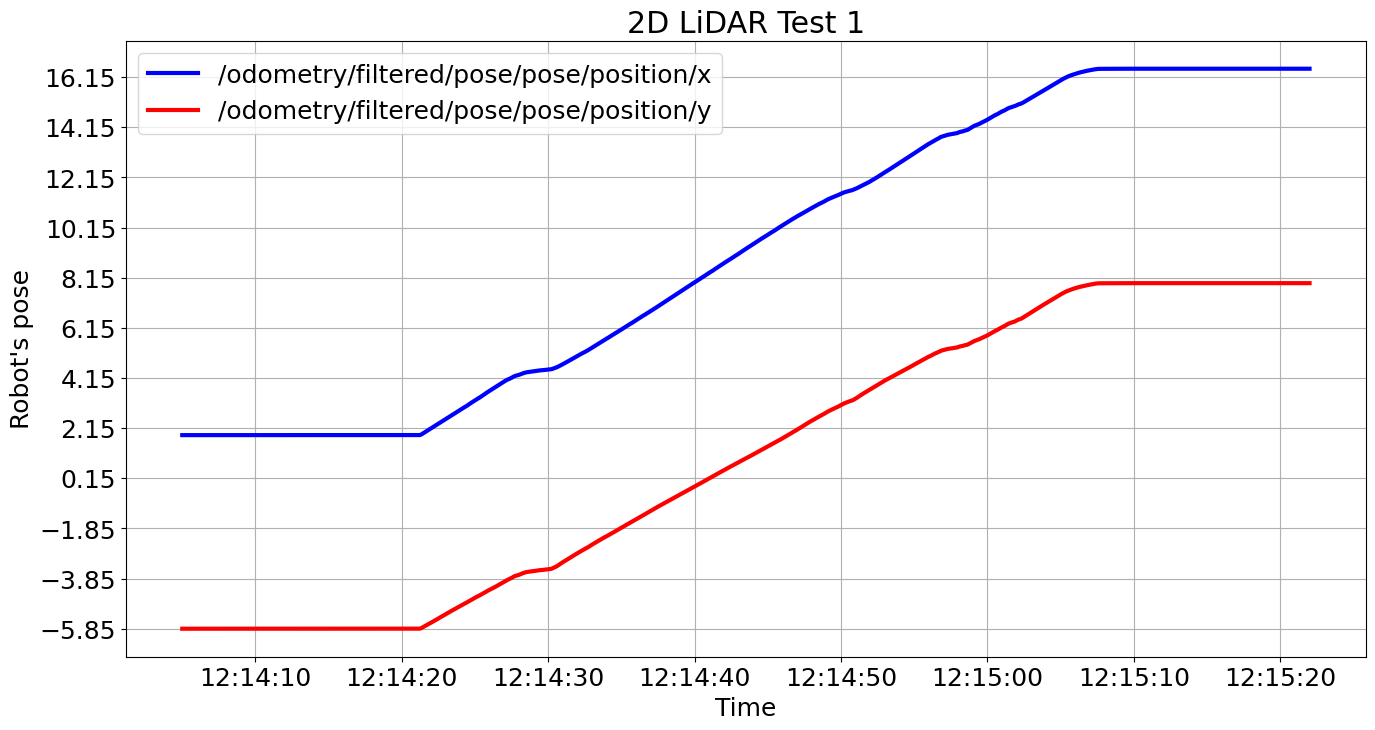

In [47]:
#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/odometry/filtered/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/odometry/filtered/pose/pose/position/y');
#Set title
plt.title('2D LiDAR Test 1');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="upper left")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_y), max(y_x)+1, 2));
#Show grid
plt.grid()

[INFO]  Data folder /content/drive/MyDrive/Thesis/Bags/Test_2_2D_LiDAR already exists. Not creating.


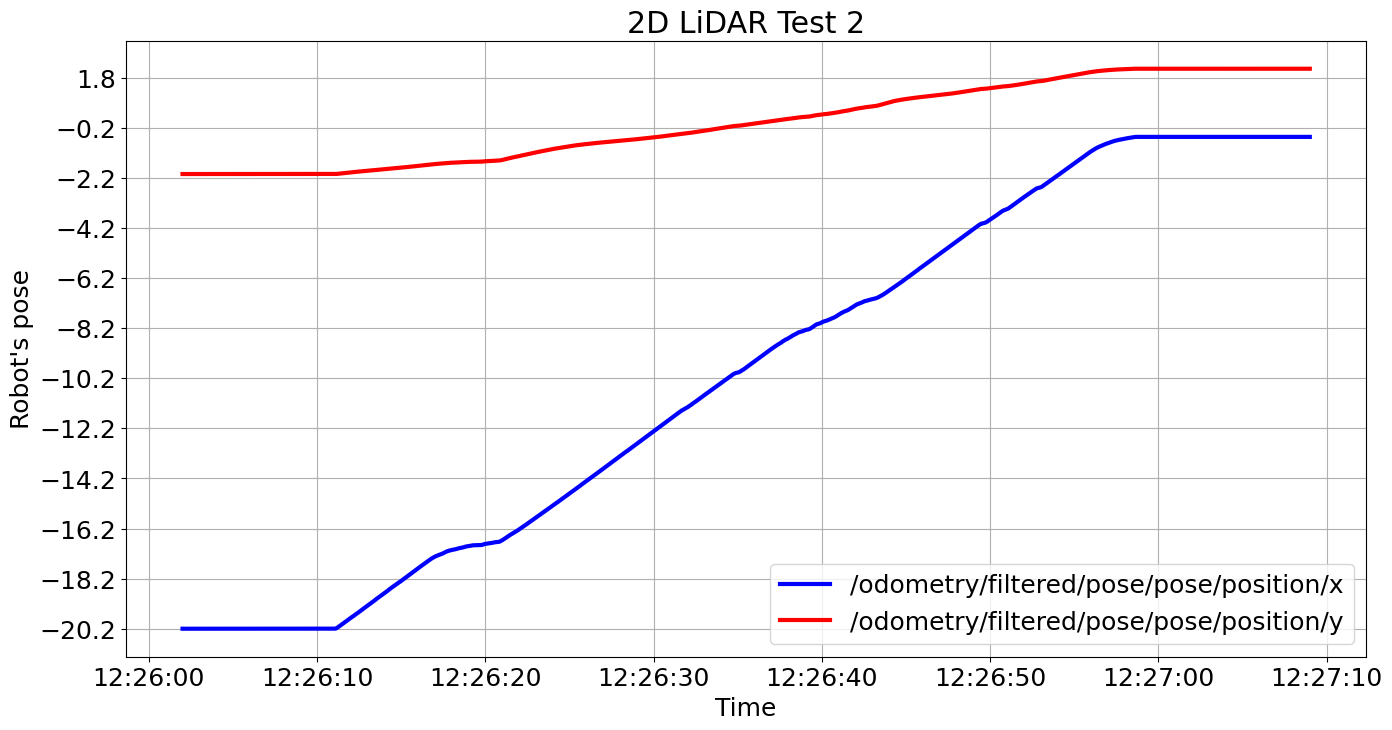

In [54]:
#2D LiDAR plot 2
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_2_2D_LiDAR.bag')
odometry = b.message_by_topic('/odometry/filtered')
df_odom = pd.read_csv(odometry)
#Smooth the curve
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), y_x.size) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

#Change to readable time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/odometry/filtered/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/odometry/filtered/pose/pose/position/y');
#Set title
plt.title('2D LiDAR Test 2');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="lower right")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_x), max(y_y)+1, 2));
#Show grid
plt.grid()

[INFO]  Data folder /content/drive/MyDrive/Thesis/Bags/Test_3_2D_LiDAR already exists. Not creating.


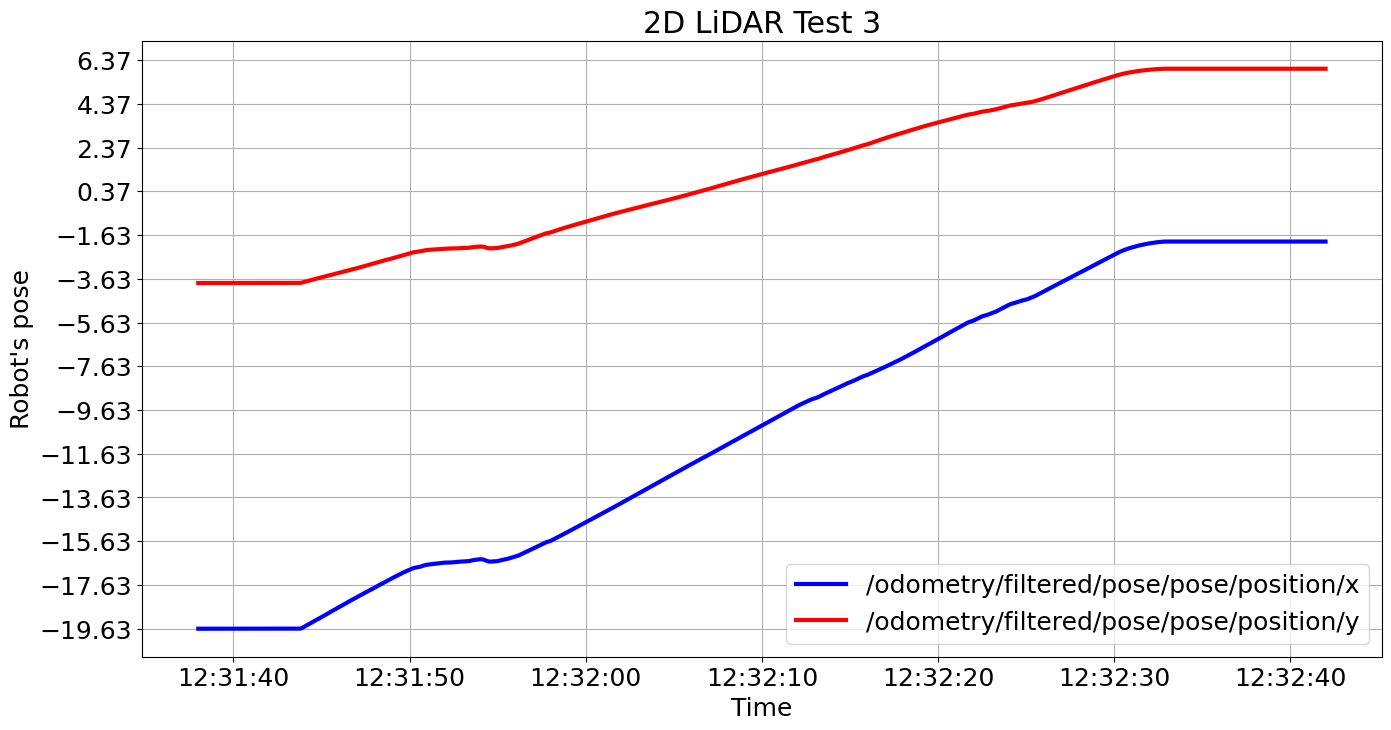

In [55]:
#2D LiDAR plot 3
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_3_2D_LiDAR.bag')
odometry = b.message_by_topic('/odometry/filtered')
df_odom = pd.read_csv(odometry)
#Smooth the curve
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), y_x.size) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

#Change to readable time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/odometry/filtered/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/odometry/filtered/pose/pose/position/y');
#Set title
plt.title('2D LiDAR Test 3');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="lower right")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_x), max(y_y)+1, 2));
#Show grid
plt.grid()

[INFO]  Data folder /content/drive/MyDrive/Thesis/Bags/Test_4_2D_LiDAR already exists. Not creating.


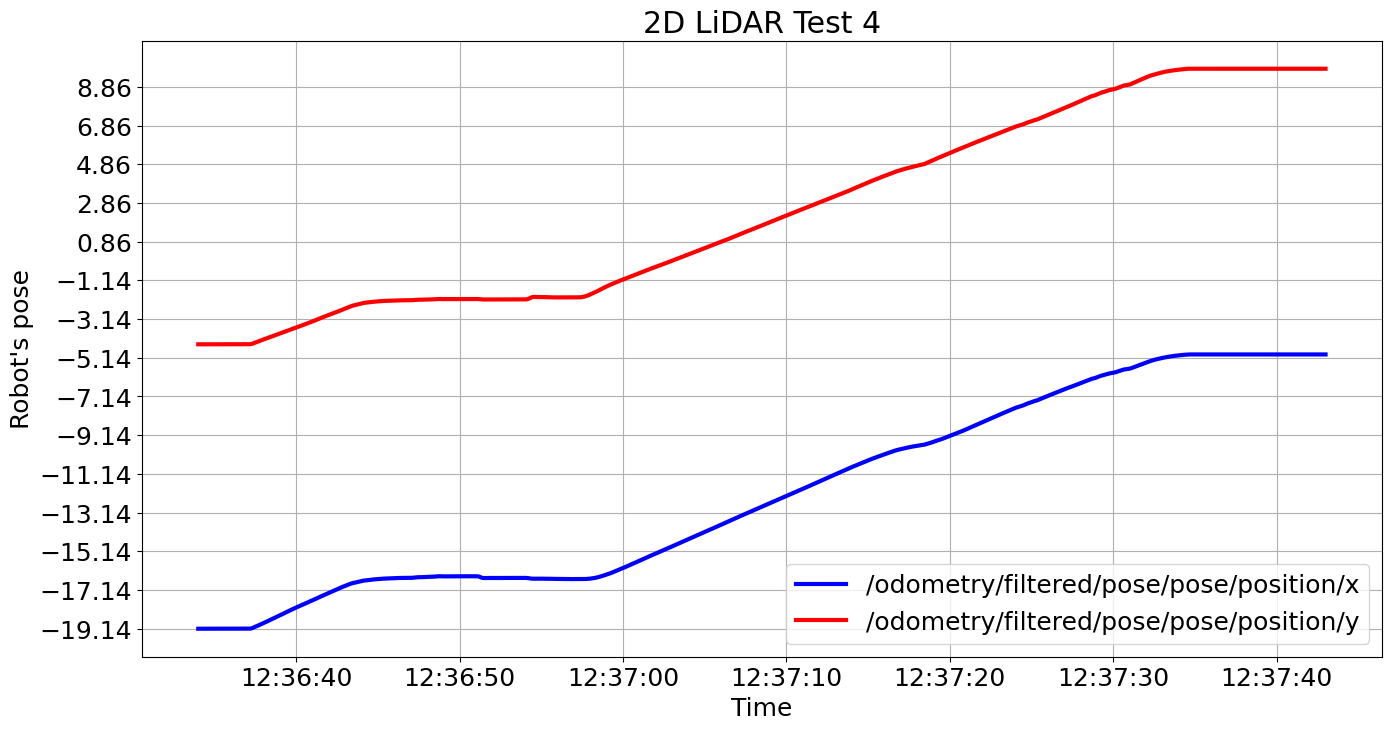

In [56]:
#2D LiDAR plot 4
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_4_2D_LiDAR.bag')
odometry = b.message_by_topic('/odometry/filtered')
df_odom = pd.read_csv(odometry)
#Smooth the curve
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), y_x.size) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

#Change to readable time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/odometry/filtered/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/odometry/filtered/pose/pose/position/y');
#Set title
plt.title('2D LiDAR Test 4');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="lower right")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_x), max(y_y)+1, 2));
#Show grid
plt.grid()

[INFO]  Successfully created the data folder /content/drive/MyDrive/Thesis/Bags/Test_5_2D_LiDAR.


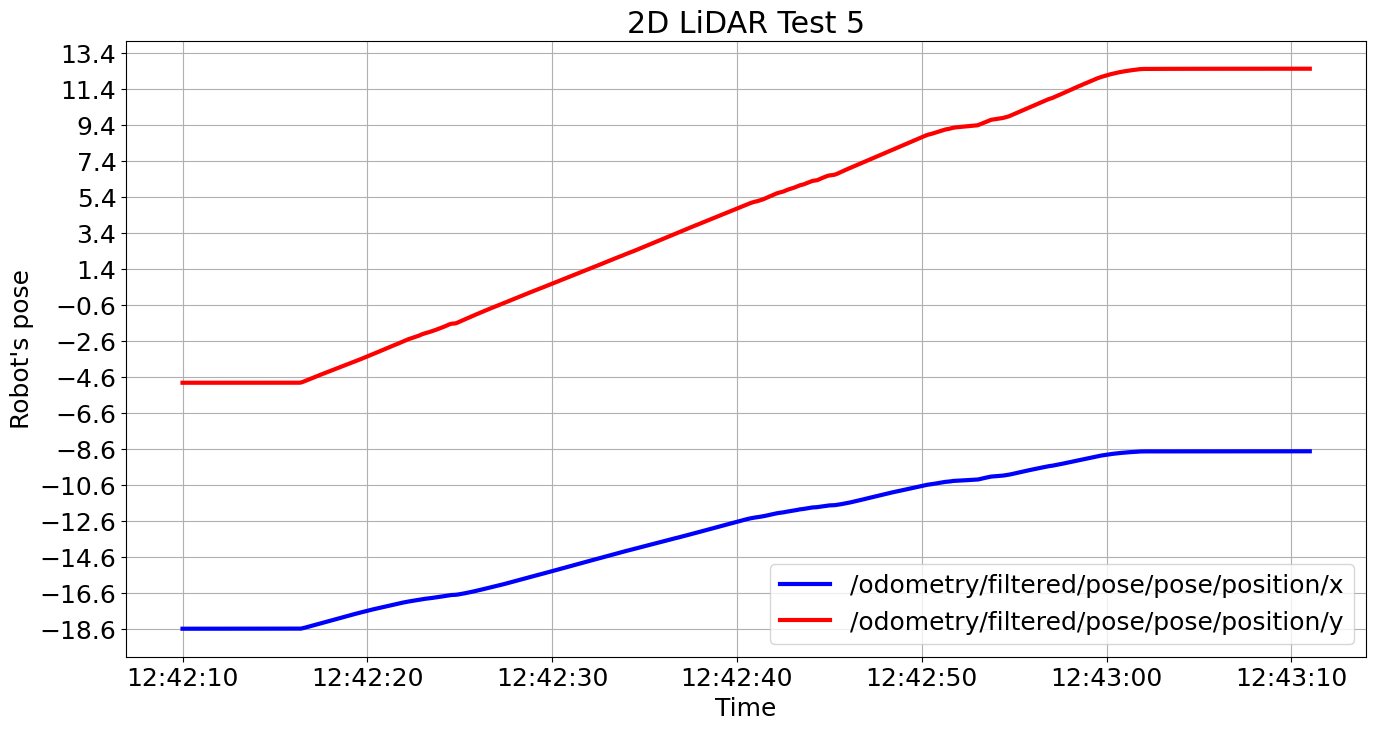

In [57]:
#2D LiDAR plot 5
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_5_2D_LiDAR.bag')
odometry = b.message_by_topic('/odometry/filtered')
df_odom = pd.read_csv(odometry)
#Smooth the curve
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), y_x.size) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

#Change to readable time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/odometry/filtered/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/odometry/filtered/pose/pose/position/y');
#Set title
plt.title('2D LiDAR Test 5');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="lower right")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_x), max(y_y)+1, 2));
#Show grid
plt.grid()

[INFO]  Data folder /content/drive/MyDrive/Thesis/Bags/Test_1_3D_LiDAR already exists. Not creating.


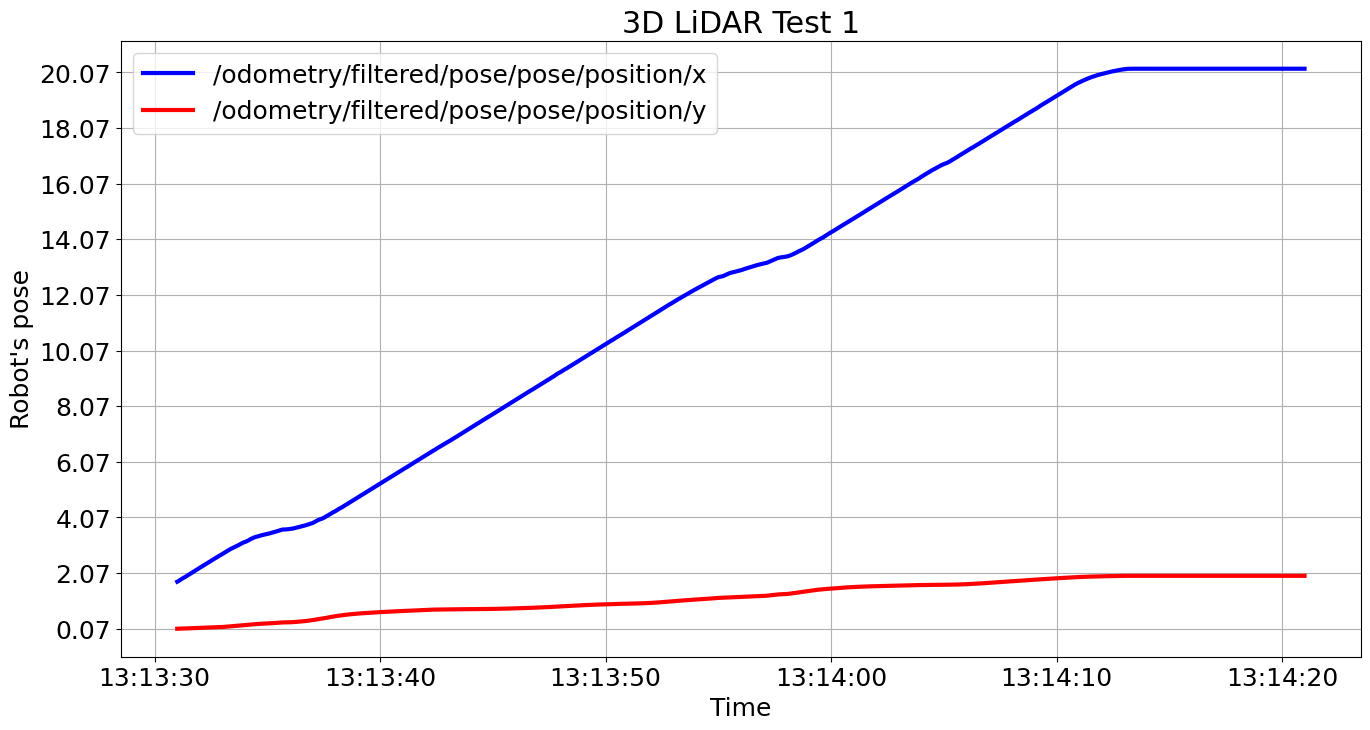

In [59]:
#3D LiDAR plot 1
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_1_3D_LiDAR.bag')
odometry = b.message_by_topic('/odometry/filtered')
df_odom = pd.read_csv(odometry)
#Smooth the curve
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), y_x.size) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

#Change to readable time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/odometry/filtered/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/odometry/filtered/pose/pose/position/y');
#Set title
plt.title('3D LiDAR Test 1');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="upper left")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_y), max(y_x)+1, 2));
#Show grid
plt.grid()

[INFO]  Successfully created the data folder /content/drive/MyDrive/Thesis/Bags/Test_2_3D_LiDAR.


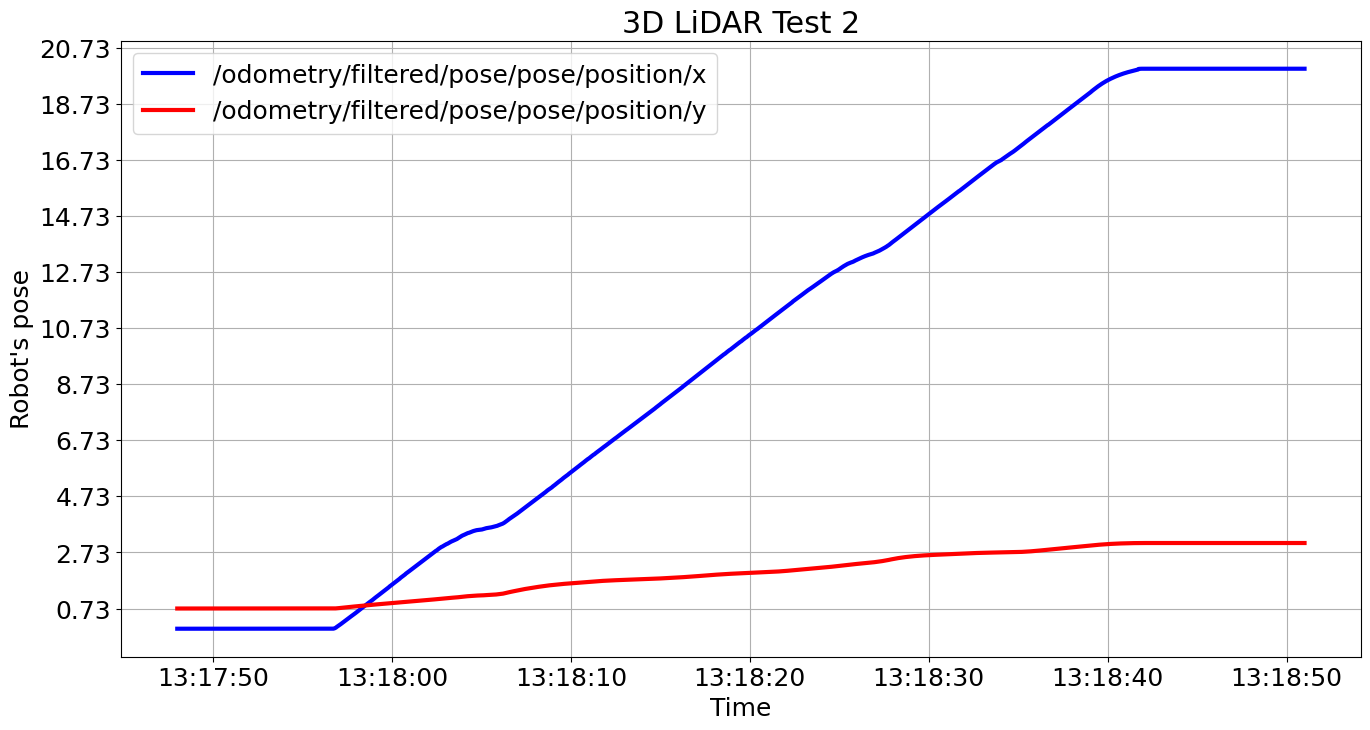

In [60]:
#3D LiDAR plot 2
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_2_3D_LiDAR.bag')
odometry = b.message_by_topic('/odometry/filtered')
df_odom = pd.read_csv(odometry)
#Smooth the curve
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), y_x.size) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

#Change to readable time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/odometry/filtered/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/odometry/filtered/pose/pose/position/y');
#Set title
plt.title('3D LiDAR Test 2');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="upper left")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_y), max(y_x)+1, 2));
#Show grid
plt.grid()

[INFO]  Successfully created the data folder /content/drive/MyDrive/Thesis/Bags/Test_3_3D_LiDAR.


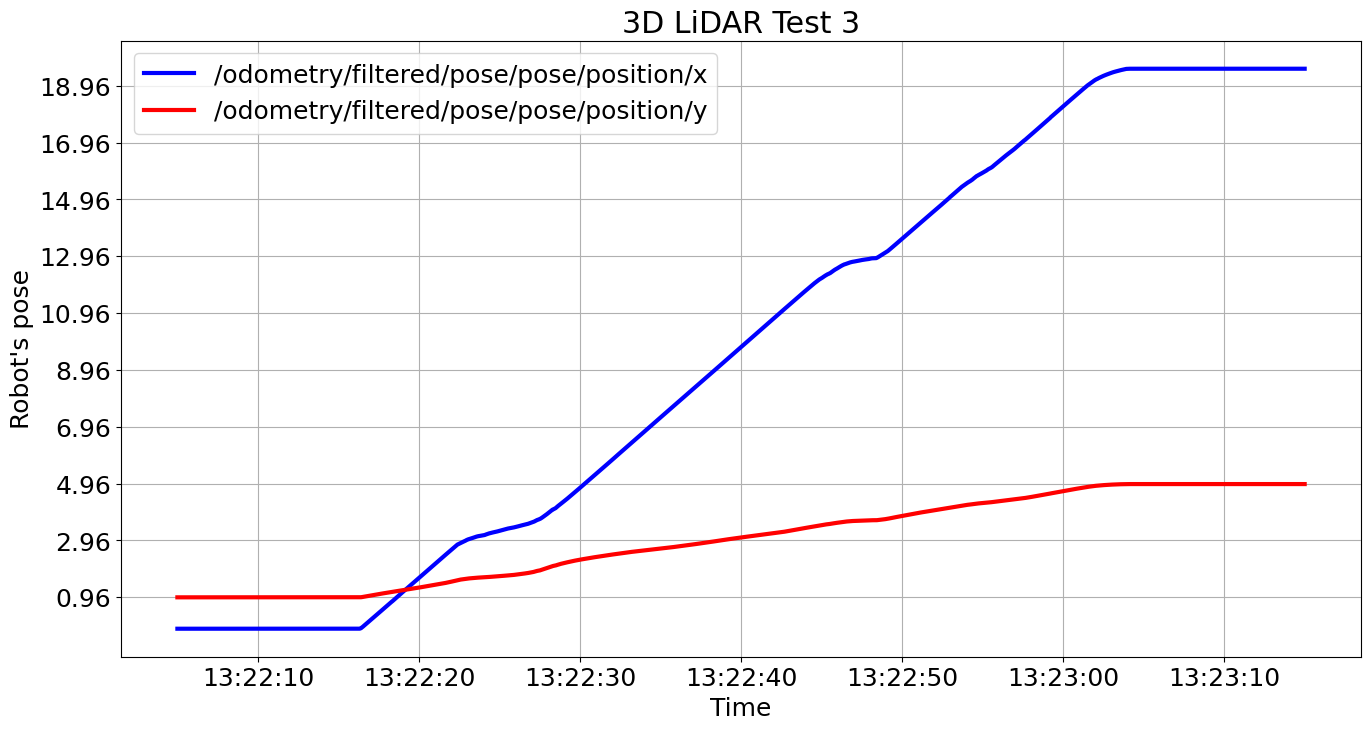

In [61]:
#3D LiDAR plot 3
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_3_3D_LiDAR.bag')
odometry = b.message_by_topic('/odometry/filtered')
df_odom = pd.read_csv(odometry)
#Smooth the curve
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), y_x.size) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

#Change to readable time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/odometry/filtered/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/odometry/filtered/pose/pose/position/y');
#Set title
plt.title('3D LiDAR Test 3');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="upper left")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_y), max(y_x)+1, 2));
#Show grid
plt.grid()

[INFO]  Successfully created the data folder /content/drive/MyDrive/Thesis/Bags/Test_4_3D_LiDAR.


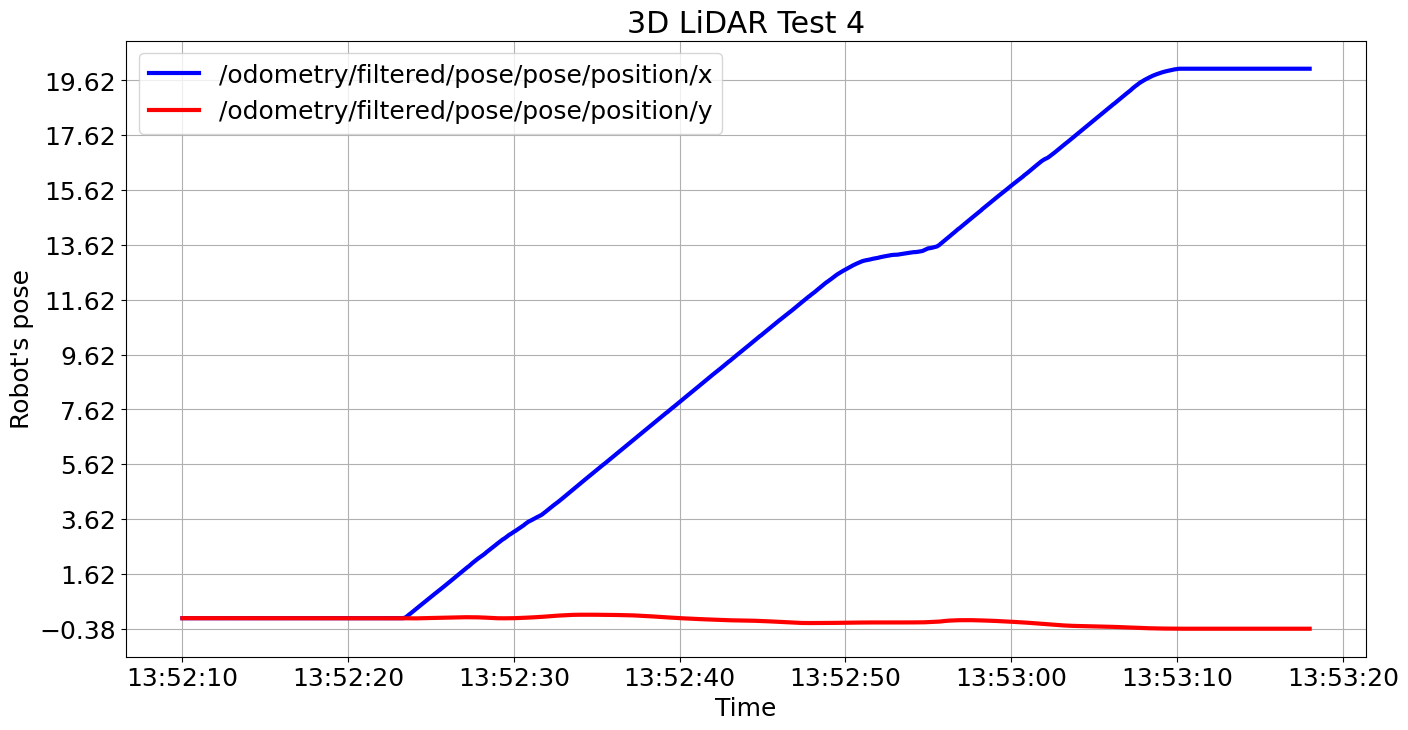

In [62]:
#3D LiDAR plot 4
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_4_3D_LiDAR.bag')
odometry = b.message_by_topic('/odometry/filtered')
df_odom = pd.read_csv(odometry)
#Smooth the curve
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), y_x.size) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

#Change to readable time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/odometry/filtered/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/odometry/filtered/pose/pose/position/y');
#Set title
plt.title('3D LiDAR Test 4');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="upper left")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_y), max(y_x)+1, 2));
#Show grid
plt.grid()

[INFO]  Successfully created the data folder /content/drive/MyDrive/Thesis/Bags/Test_5_3D_LiDAR.


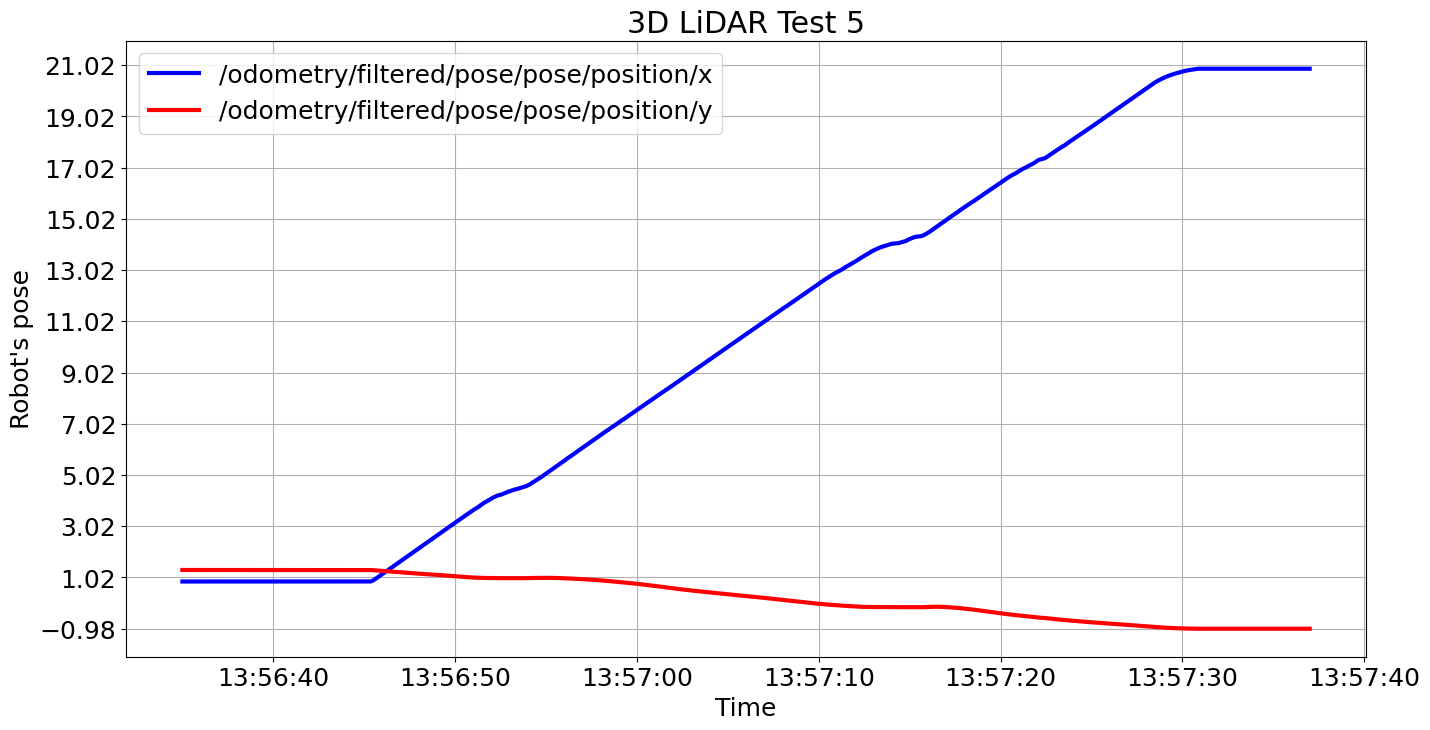

In [63]:
#3D LiDAR plot 5
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_5_3D_LiDAR.bag')
odometry = b.message_by_topic('/odometry/filtered')
df_odom = pd.read_csv(odometry)
#Smooth the curve
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), y_x.size) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

#Change to readable time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/odometry/filtered/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/odometry/filtered/pose/pose/position/y');
#Set title
plt.title('3D LiDAR Test 5');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="upper left")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_y), max(y_x)+1, 2));
#Show grid
plt.grid()

[INFO]  Data folder /content/drive/MyDrive/Thesis/Bags/Test_1_Simulation_3D_LiDAR already exists. Not creating.


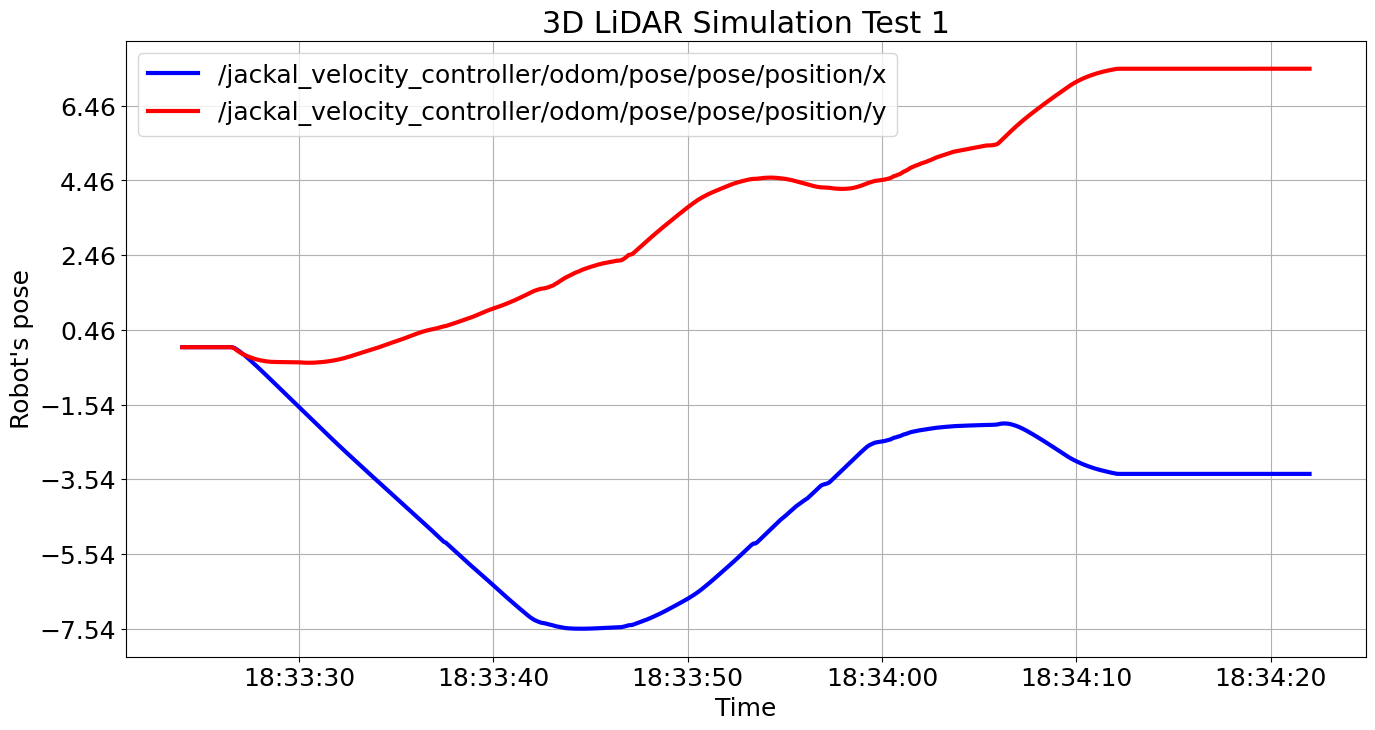

In [72]:
#3D LiDAR Simulation plot 1
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_1_Simulation_3D_LiDAR.bag')
odometry = b.message_by_topic('/jackal_velocity_controller/odom')
df_odom = pd.read_csv(odometry)
#Smooth the curve
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), y_x.size) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

#Change to readable time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/jackal_velocity_controller/odom/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/jackal_velocity_controller/odom/pose/pose/position/y');
#Set title
plt.title('3D LiDAR Simulation Test 1');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="upper left")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_x), max(y_y)+1, 2));
#Show grid
plt.grid()

[INFO]  Data folder /content/drive/MyDrive/Thesis/Bags/Test_2_Simulation_3D_LiDAR already exists. Not creating.


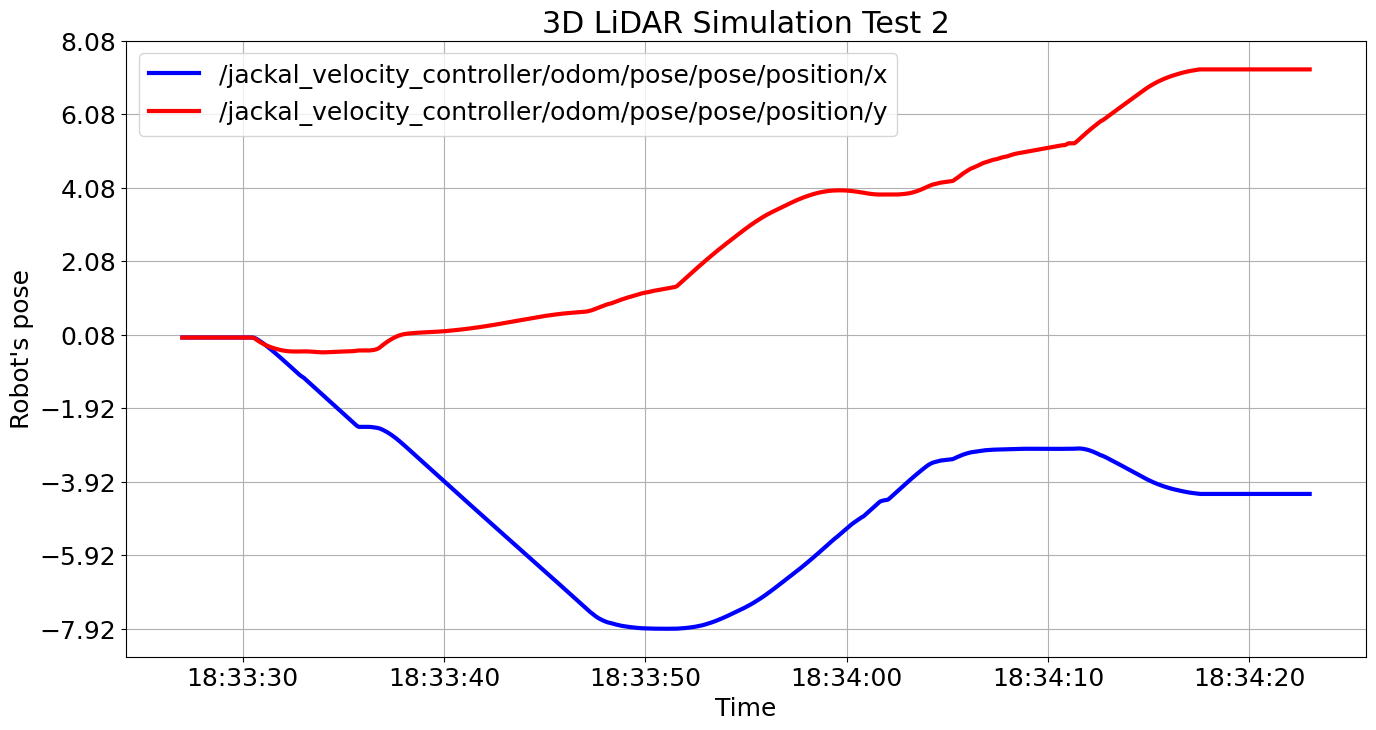

In [73]:
#3D LiDAR Simulation plot 2
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_2_Simulation_3D_LiDAR.bag')
odometry = b.message_by_topic('/jackal_velocity_controller/odom')
df_odom = pd.read_csv(odometry)
#Smooth the curve
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), y_x.size) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

#Change to readable time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/jackal_velocity_controller/odom/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/jackal_velocity_controller/odom/pose/pose/position/y');
#Set title
plt.title('3D LiDAR Simulation Test 2');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="upper left")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_x), max(y_y)+1, 2));
#Show grid
plt.grid()

[INFO]  Data folder /content/drive/MyDrive/Thesis/Bags/Test_3_Simulation_3D_LiDAR already exists. Not creating.


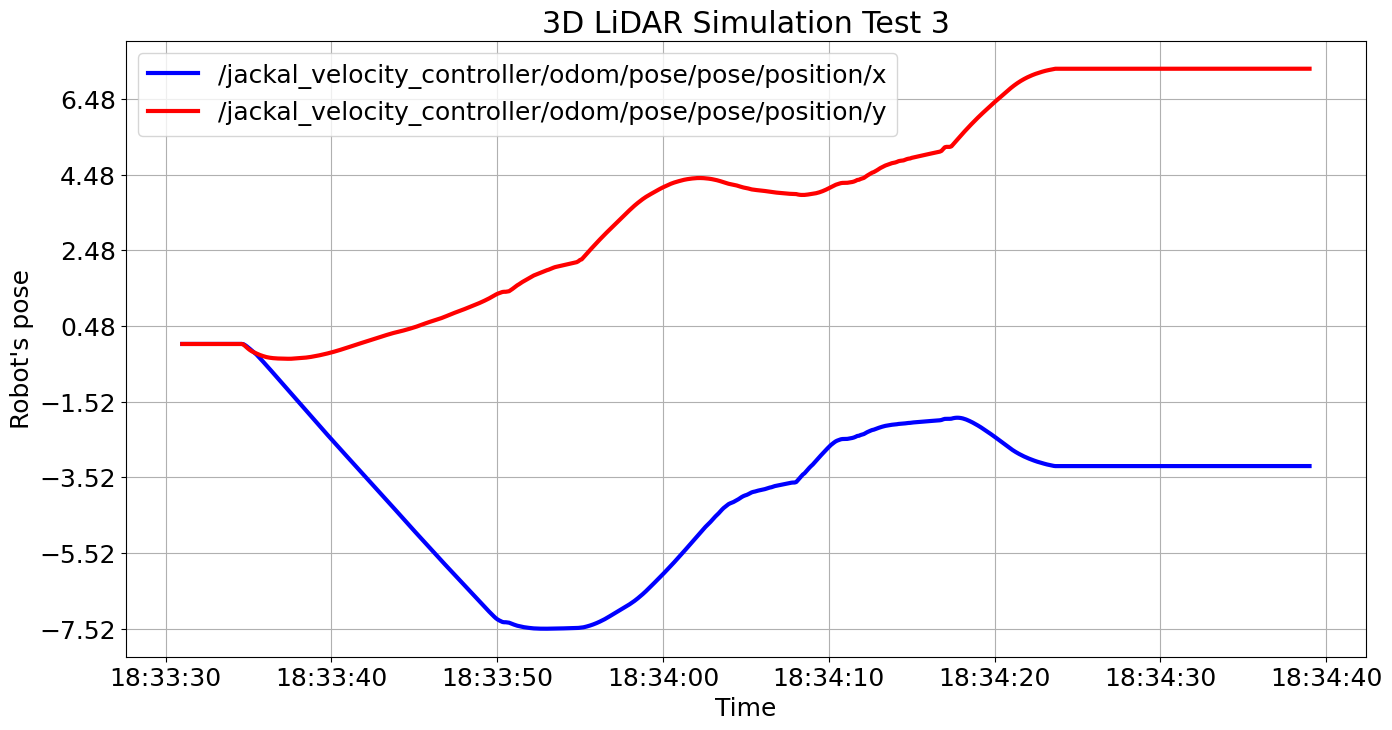

In [74]:
#3D LiDAR Simulation plot 3
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_3_Simulation_3D_LiDAR.bag')
odometry = b.message_by_topic('/jackal_velocity_controller/odom')
df_odom = pd.read_csv(odometry)
#Smooth the curve
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), y_x.size) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

#Change to readable time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/jackal_velocity_controller/odom/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/jackal_velocity_controller/odom/pose/pose/position/y');
#Set title
plt.title('3D LiDAR Simulation Test 3');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="upper left")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_x), max(y_y)+1, 2));
#Show grid
plt.grid()

[INFO]  Data folder /content/drive/MyDrive/Thesis/Bags/Test_4_Simulation_3D_LiDAR already exists. Not creating.


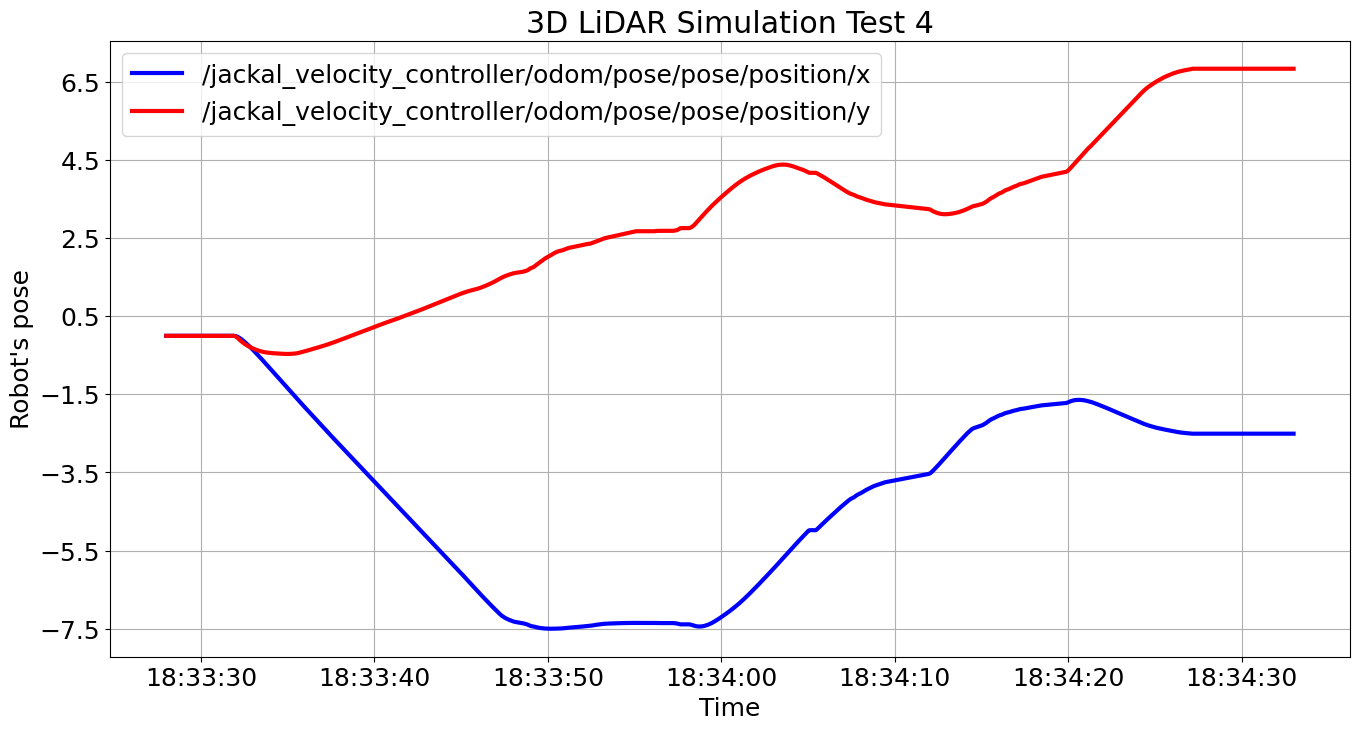

In [75]:
#3D LiDAR Simulation plot 4
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_4_Simulation_3D_LiDAR.bag')
odometry = b.message_by_topic('/jackal_velocity_controller/odom')
df_odom = pd.read_csv(odometry)
#Smooth the curve
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), y_x.size) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

#Change to readable time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/jackal_velocity_controller/odom/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/jackal_velocity_controller/odom/pose/pose/position/y');
#Set title
plt.title('3D LiDAR Simulation Test 4');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="upper left")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_x), max(y_y)+1, 2));
#Show grid
plt.grid()

[INFO]  Data folder /content/drive/MyDrive/Thesis/Bags/Test_5_Simulation_3D_LiDAR already exists. Not creating.


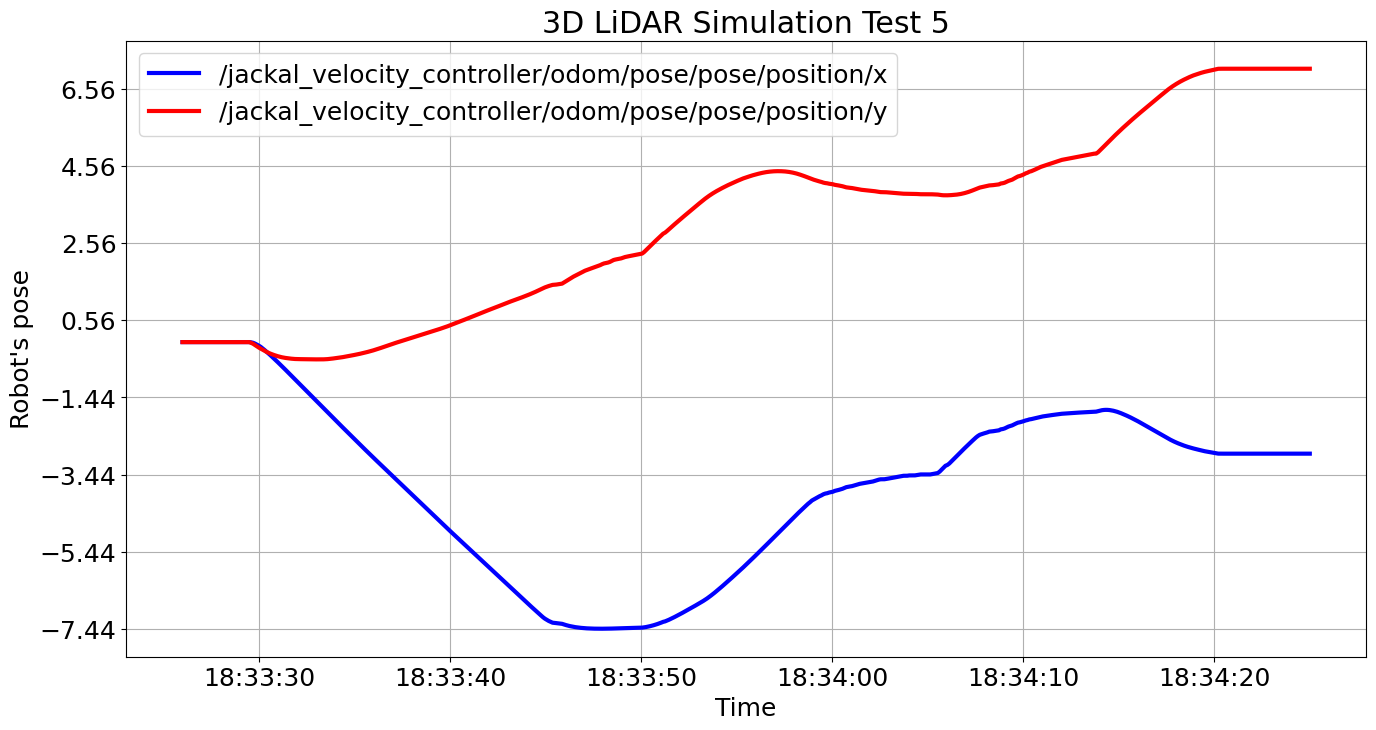

In [76]:
#3D LiDAR Simulation plot 5
b = bagreader('/content/drive/MyDrive/Thesis/Bags/Test_5_Simulation_3D_LiDAR.bag')
odometry = b.message_by_topic('/jackal_velocity_controller/odom')
df_odom = pd.read_csv(odometry)
#Smooth the curve
x = df_odom['header.stamp.secs']
y_x = df_odom['pose.pose.position.x']
y_y = df_odom['pose.pose.position.y']

#Generate same amount of points as in y axis
#This also ensures that points are evenly distributed, with same steps between them
x_smooth = np.linspace(x.min(), x.max(), y_x.size) 

#Makes the spline function using x and y data
spline_x = make_interp_spline(x_smooth, y_x)
spline_y = make_interp_spline(x_smooth, y_y)

#Generates the new points for y axis that are already smothen 
y_x_smooth = spline_x(x_smooth)
y_y_smooth = spline_y(x_smooth)

#Change to readable time
s_time = pd.to_datetime(x_smooth, unit='s', utc=True).map(lambda x: x.tz_convert('America/Mexico_City'))

#Generate plot size
plt.figure(figsize=(16,8));
#Plot x and y axes lines 
#b -> blue
#r -> red
#Lable used for legend
plt.plot(s_time, y_x_smooth, 'b', linewidth=3, label='/jackal_velocity_controller/odom/pose/pose/position/x');
plt.plot(s_time, y_y_smooth, 'r', linewidth=3, label='/jackal_velocity_controller/odom/pose/pose/position/y');
#Set title
plt.title('3D LiDAR Simulation Test 5');
#Set x and y axes labels
plt.xlabel('Time');
plt.ylabel("Robot's pose");
#Display legend
plt.legend(loc="upper left")
#Reduce step size in y axis ticks
plt.yticks(np.arange(min(y_x), max(y_y)+1, 2));
#Show grid
plt.grid()